<a href="https://colab.research.google.com/github/Arseniy16/Computational_Math/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 3
### *Решение нелинейных уравнений вида f(x) = 0*

---

1. Реализовать метод деления отрезка пополам.
2. Реализовать методы секущих и Ньютона. Предусмотреть
оценку кратности корня.
3. Реализовать метод Ньютона для системы нелинейных уравнений.
При решении возникающих линейных систем воспользоваться результатами лабораторной работы 2


### Метод деления отрезка пополам:

Алгоритм основан на следующем следствии из теоремы Больцано — Коши:

Пусть непрерывная функция ${\displaystyle f(x)\in \mathrm {C} ([a,\;b])}$, тогда, если ${\displaystyle sign(f(a))\neq sign(f(b))}$, то ${\displaystyle \exists c\in [a,\;b]:\;f(c)=0}$

---



### Метод секущих:

Для нахождения численного решения уравнения ${\displaystyle f(x)=0}$ метод секущих задается следующим реккурентным соотношением:

$$
    x_n = x_{n-1} - f(x_{n-1}) \dfrac{x_{n-1} - x_{n-2}}{f(x_{n-1}) - f(x_{n-2})}
$$

Из формулы видно, что необходимо два начальных значения $x_0$ и $x_1$ (желательно выбирать ближе к нулю)

---


### Метод Ньютона для решения нелинейных уравнений

Алгоритм нахождения численного решения уравнения ${\displaystyle f(x)=0}$ сводится к итерационной процедуре вычисления:

$$
    x_{n+1} = x_n - \dfrac{f(x_n)}{f'(x_n)}
$$

Для оценки кратности корня, можно воспользоваться следующей формулой:

$$
    q_n = \dfrac{x_{n+1} - x_n}{x_n - x_{n-1}},\; p_n = \dfrac{1}{1 - q_n} 
$$

Если $p_n \rightarrow p $, где $p \in \mathbb{Z}$, то это будет искомая кратность корня.

---

### Метод Ньютона для решения системы нелинейных уравнений

Пусть дана система из $n$ нелинейных уравнений:

\begin{equation*} 
 \begin{cases}
   f_1(x_1, \;...,\; x_n ) = 0,\\
   f_2(x_1, \;...,\; x_n ) = 0,\\
   \vdots \\
   f_n(x_1, \;...,\; x_n ) = 0
 \end{cases}
 \\
 F(x) = [f_1(x),\; f_2(x),\; \dots,\; f_n(x)]^T
\end{equation*}

Формула для нахождения решения уравнения:

$$
    x^{(k+1)} = x^{(k)} - W^{-1}(x^{(k)}) \cdot F(x^{(k)}) 
$$

Для этого, вначале можно решить систему линейных уравнений относительно $\Delta x^{(k)}$:

$$
    W(x^{(k)}) \cdot \Delta x^{(k)} = -F(x^{(k)})    
$$

А затем получим: $x^{(k+1)} = x^{(k)} + \Delta x^{(k)}$ 


---



Рассмотрим уравнение вида: $(x-2)^3 = 0$

Найдем решения и оценим кратность корня

In [ ]:
import math

# func =  lambda x: 2 * x ** 3 - 3 * x ** 2 - 12 * x - 3
# func_diff = lambda x: 6 * x ** 2 - 6 * x - 12

func = lambda x: (x-2) ** 3
func_diff = lambda x: 3*(x-2) ** 2

a1, b1 = 0.0, 10.0

eps = 0.001

# метод деления отрезка пополам
def method_half_divide(a, b, eps, f):
    
    numIters = 0
    x = (a + b) / 2

    while math.fabs(f(x)) >= eps:
        x = (a + b) / 2
        a, b = (a, x) if f(a) * f(x) < 0 else (x, b)
        numIters += 1

    print('Кол-во итераций:', numIters)

    return (a + b) / 2

# метод секущих
def method_secant(x0, x1, eps, f):
    
    numIters = 0

    while math.fabs(f(x1)) >= eps :
        # temp = x0
        x2 = x1 - f(x1) * (x1 - x0) / float(f(x1) - f(x0))
        x0, x1 = x1, x2
        numIters += 1

    print('Кол-во итераций:', numIters)

    return x1

# метод ньютона
def method_newton(a, b, eps, f, df):

    numIters = 0

    x0 = (a + b) / 2
    x1 = x0 - (f(x0) / df(x0))

    while math.fabs(x1 - x0) >= eps:
        temp = x0
        x0 = x1
        x1 = x0 - (f(x0) / df(x0))
        numIters += 1
        
    q = (x1 - x0) / float(x0 - temp)
    p = 1 / float(1 - q) # кратность корня 

    print('Кол-во итераций:', numIters)
    print('Кратность корня = ', p )

    return x1


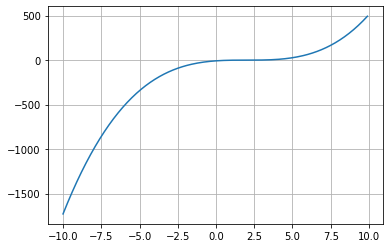

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10.0
xmax =  10.0
dx = 0.1

xlist = np.arange(xmin, xmax, dx)
# xlist = np.linspace(xmin, xmax, dx)

plt.plot(xlist, func(xlist))
plt.grid()

In [ ]:
# метод деления отрезка пополам
root_half_divide = method_half_divide(a1, b1, eps, func)
print('\nМетод деления отрезка пополам\nКорень уравнения:', root_half_divide)


Кол-во итераций: 6

Метод деления отрезка пополам
Корень уравнения: 1.953125


In [ ]:
# метод секущих
root_secant = method_secant(1, 4, eps, func)
print('\nМетод секущих\nКорень уравнения:', root_secant)

Кол-во итераций: 9

Метод секущих
Корень уравнения: 1.9231693782655974


In [ ]:
# метод Ньютона
root_newton = method_newton(-1, 4, eps, func, func_diff)
print('\nМетод Ньютона\nКорень уравнения:', root_newton)

Кол-во итераций: 13
Кратность корня =  2.9999999999999996

Метод Ньютона
Корень уравнения: 1.9982872563046092


In [ ]:
from numpy import linalg

N = 5

def func_new(x):
    f = np.zeros([N])

    for i in range(1, N - 1, 1):

        f[i] = (3 + 2 * x[i]) * x[i] - x[i-1] - 2 * x[i+1] - 2

    f[0] = (3 + 2 * x[0] ) * x[0] - 2 * x[1] - 3
    f[N-1] = (3 + 2*x[N-1] )*x[N-1] - x[N-2] - 4

    return f

# вычисление якобиана
def jacobian(f, x):
    h = 1.0e-4
    n = len(x)
    Jac = np.zeros([n,n])
    f0 = f(x)

    for i in range(0, n, 1):
        tt = x[i]
        x[i] = tt + h
        f1= f(x)
        x[i] = tt
        Jac [:,i] = (f1 - f0)/h
    return Jac, f0

# метод Ньютона для СНАУ
def newton(f, x, eps=1.0e-9):
    numIters = 0
    
    while True:
        Jac, f0 = jacobian(f, x) 
        if math.sqrt(np.dot(f0, f0) / len(x)) < eps: return x, numIters

        dx = linalg.solve(Jac, f0)
        x = x - dx
        numIters += 1


In [ ]:
# метод Ньютона для системы нелинейных алгебраичеких уравнений

x0 = np.zeros([N]) #начальные значения x
x, iter = newton(func_new, x0)

print ('Кол-во итераций:', iter)
print ('\nМетод Ньютона для СНАУ\nРешение:', x)


Кол-во итераций: 8

Метод Ньютона для СНАУ
Решение: [1. 1. 1. 1. 1.]
